<a href="https://colab.research.google.com/github/letMarchezi/AdventOfCode2022/blob/main/Bix_case_estagio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = "https://drive.google.com/file/d/1OG4dr83QS8TGNbTMqWP4gUNb5eAVPrtg/view?usp=drive_link"
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df_test = pd.read_csv(url,na_values="na")

In [ ]:
url = "https://drive.google.com/file/d/1D90EBW6l6iWZN3StxZgYKf_4zuzq-83A/view?usp=drive_link"
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df_train = pd.read_csv(url,na_values="na")

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df_train.info()

In [ ]:
df_train.head(20)

### Questions

#### Q2

In [ ]:
df_train["class"].value_counts()

In [ ]:
(1000)/(59000+1000)

#### Q3

In [ ]:
df_train["ee_003"].mean()

In [ ]:
df_train["ee_003"].median()

In [ ]:
df_train["ee_003"].std()

#### Q4

In [ ]:
train_not_null = df_train.dropna()

In [ ]:
train_not_null["ag_002"].mean()

In [ ]:
train_not_null["ag_002"].median()

In [ ]:
train_not_null["ag_002"].std()

#### Q5

By saying 'Don't consider null values', the correlation coefficient was calculated using the dataframe after dropping all the null values, it is, all rows with any null values were removed, and not only the null values for any of the 2 columns.

In [ ]:
num=['ag_002','ee_007']

corr_df = train_not_null[num]
cor= corr_df.corr(method='spearman')
print(cor)

#### Q6

By saying 'Don't consider null values', the correlation coefficient was calculated using the dataframe after dropping all the null values, it is, all rows with any null values were removed, and not only the null values for any of the 2 columns.

In [ ]:
num=['ee_005','ac_000']

corr_df = train_not_null[num]
cor= corr_df.corr(method='pearson')
print(cor)

#### Q7

In [ ]:
df_group = train_not_null.groupby("class")

In [ ]:
df_group["ad_000"].median()

#### Q8

In [ ]:
df_train.groupby("class")["ee_001"].mean()

#### Q9

In [ ]:
df_train.isna().sum().sum()

#### Q10

In [ ]:
df_train.isna().sum().sort_values(ascending=False)[0:5]

#### Q12

In [ ]:
quantile_value = train_not_null['ci_000'].quantile(0.32)
quantile_value

### Continuação

In [ ]:
df_train["class"] = df_train["class"].apply(lambda x: 1 if x =="pos" else 0)
df_test["class"] = df_test["class"].apply(lambda x: 1 if x =="pos" else 0)

In [ ]:
cor = df_train.corr(method='pearson')
print(cor)

In [ ]:
keys_neg = cor["class"].sort_values(ascending=True).keys()[0:5]
keys_pos = cor["class"].sort_values(ascending=False).keys()[0:6]

In [ ]:
keys_neg

In [ ]:
cor_filtered = cor[[*keys_pos,*keys_neg]].loc[[*keys_neg,*keys_pos]]
cor_filtered

In [ ]:
cor_filtered.shape

In [ ]:
a = list(cor_filtered.columns)
a.sort(reverse=True)
a.remove('class')
a.append('class')
a.reverse()
a

In [ ]:
cor_filtered = cor_filtered.loc[a]
cor_filtered = cor_filtered[a]

In [ ]:
cor_filtered

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Some variables show high correlation to others, such as bb_000, bu_000, bv_000... This phenomenon can impact negatively the analysis and the final model in case where the data is redundant.

In [ ]:
# Plotting the correlation plot
plt.figure(figsize=(10, 8))

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(cor_filtered, dtype=bool))
sns.heatmap(cor_filtered, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
sns.color_palette("coolwarm", as_cmap=True).get_over()

In [ ]:
cor_variables = [['class','cq_000'],['class','ci_000'],['class','br_000'],['class','bq_000'],
                 ['bb_000','ci_000'],['bb_000','br_000'],['bn_000','bo_000'],['bn_000','ci_000'],
                 ['bu_000','ci_000'],['bu_000','bv_000'],['br_000','cq_000'],['br_000','ci_000']]

ValueError: Could not interpret value `br_000` for `y`. An entry with this name does not appear in `data`.

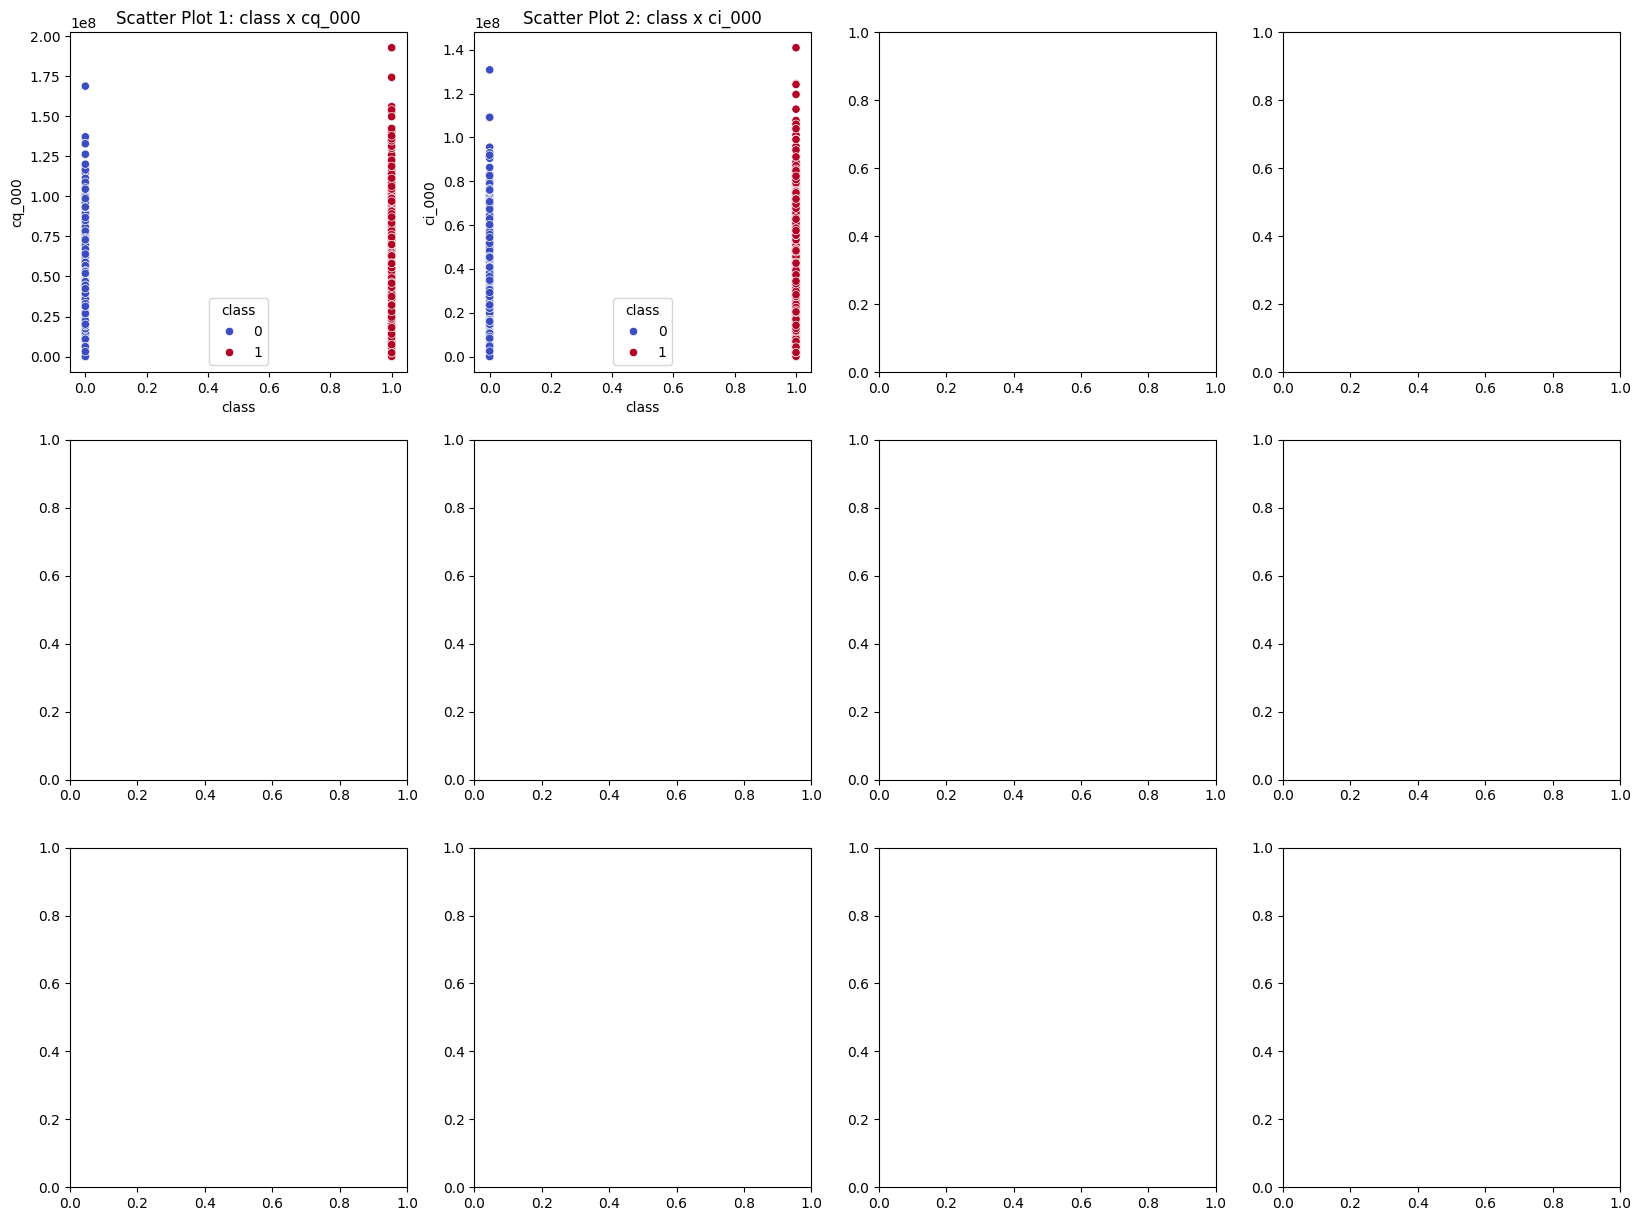

In [116]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))


colours = [[0.2298057, 0.29871797, 0.75368315, 1.],[0.70567316, 0.01555616, 0.15023281, 1.]]
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate 12 scatter plots
for i in range(12):
    sns.scatterplot(data=df_train, x=cor_variables[i][0], y=cor_variables[i][1], hue="class", ax=axes[i], palette=colours)
    axes[i].set_title(f'Scatter Plot {i+1}: {cor_variables[i][0]} x {cor_variables[i][1]}')

plt.tight_layout()
plt.show()

In [ ]:
for col in df_train.columns:
    pos_nan = df_train[df_train["class"]==1][col].isna().sum()
    neg_nan = df_train[df_train["class"]==0][col].isna().sum()
    if (pos_nan+neg_nan) > 0.2*(len(df_train)):
        df_train =  df_train.drop(columns=[col])
        df_test=  df_test.drop(columns=[col])
        print(f"Dropping column {col}")
    print(f"NaN values for column {col}. Total NaN values: {pos_nan+neg_nan}")
    print(f"Positive class: {pos_nan} missing values")
    print(f"Negative class: {neg_nan} missing values\n")

NaN values for column class. Total NaN values: 0
Positive class: 0 missing values
Negative class: 0 missing values

NaN values for column aa_000. Total NaN values: 0
Positive class: 0 missing values
Negative class: 0 missing values

Dropping column ab_000
NaN values for column ab_000. Total NaN values: 46329
Positive class: 771 missing values
Negative class: 45558 missing values

NaN values for column ac_000. Total NaN values: 3335
Positive class: 462 missing values
Negative class: 2873 missing values

Dropping column ad_000
NaN values for column ad_000. Total NaN values: 14861
Positive class: 645 missing values
Negative class: 14216 missing values

NaN values for column ae_000. Total NaN values: 2500
Positive class: 341 missing values
Negative class: 2159 missing values

NaN values for column af_000. Total NaN values: 2500
Positive class: 341 missing values
Negative class: 2159 missing values

NaN values for column ag_000. Total NaN values: 671
Positive class: 4 missing values
Negativ

In [ ]:
df_train["class"].value_counts()

class
0    59000
1     1000
Name: count, dtype: int64

In [ ]:
df_train.isna().sum().sum()

232852

In [ ]:
#df_train[df_train.isna().any(axis=1)]

In [ ]:
#df_train = df_train.dropna(axis=0, how="any").reset_index(drop=True)

In [ ]:
for col in df_train.columns:
    med=np.nanmedian(df_train[col])
    df_train[col] = df_train[col].fillna(med)
    med=np.nanmedian(df_test[col])
    df_test[col] = df_test[col].fillna(med)

In [ ]:
#a = df_train.dropna(axis=0, thresh=80).reset_index(drop=True)
#a["class"].value_counts()

In [ ]:
df_train["class"].value_counts()

class
0    59000
1     1000
Name: count, dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 147 entries, class to eg_000
dtypes: float64(145), int64(2)
memory usage: 67.3 MB


In [ ]:
df_test.isna().sum().sum()

0

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 147 entries, class to eg_000
dtypes: float64(145), int64(2)
memory usage: 17.9 MB


## Treinamento

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

def train_predict_model(classifier, train_data, test_data, standartization=False):


    X_train = train_data.drop(columns=["class"])
    y_train = train_data["class"]

    X_test = test_data.drop(columns=["class"])
    y_test = test_data["class"]

    if (standartization):
        #scaler = MinMaxScaler()
        scaler = preprocessing.StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)


    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the test data
    pred_y = classifier.predict(X_test)

    return y_test,pred_y

In [ ]:
def calc_mean_metrics(true_target, pred_target):
  # Initialize dictionaries to store the sum of each metric
    print(classification_report(true_target, pred_target))

    mean_metrics = {'Accuracy': 0, 'Precision': 0, 'Recall': 0, 'F1-Score': 0}

    accuracy = accuracy_score(true_target, pred_target)
    precision = precision_score(true_target, pred_target, average='macro')
    recall = recall_score(true_target, pred_target, average='macro')
    f1 = f1_score(true_target, pred_target, average='macro')

    mean_metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    return mean_metrics

In [ ]:
print("-------------------------------------------\n")
#-----------------------HG-------------------------------
print("HIST GRAD:")
true_0, pred_0 = metrics_list = train_predict_model(HistGradientBoostingClassifier(random_state=42), df_train, df_test, standartization=True)
m_0 = calc_mean_metrics(true_0, pred_0)
print("-------------------------------------------\n")
#-----------------------NB-------------------------------
#print("Complement NB:")

#true_1, pred_1 = metrics_list = train_predict_model(MultinomialNB(), df_train, df_test, standartization=True)
#m_1 = calc_mean_metrics(true_1, pred_1)

#print("-------------------------------------------\n")
#-----------------------RF-------------------------------
print("Random Forest:")
true_2, pred_2  = metrics_list = train_predict_model(RandomForestClassifier(random_state=42), df_train, df_test, standartization=True)
m_2 = calc_mean_metrics(true_2, pred_2)

print("-------------------------------------------\n")
#-----------------------KNN-------------------------------
print("KNN:")
true_3, pred_3 = metrics_list = train_predict_model(KNeighborsClassifier(), df_train, df_test, standartization=True)
m_3 = calc_mean_metrics(true_3, pred_3)

print("-------------------------------------------\n")
#-----------------------SVM-------------------------------
print("SVM:")
true_4, pred_4 = metrics_list = train_predict_model(SVC(random_state=42), df_train, df_test, standartization=True)
m_4 = calc_mean_metrics(true_4, pred_4)

from sklearn.linear_model import LogisticRegression
print("-------------------------------------------\n")
#-----------------------LR-------------------------------
print("LR:")
true_5, pred_5 = metrics_list = train_predict_model(LogisticRegression(random_state=42), df_train, df_test, standartization=True)
m_5 = calc_mean_metrics(true_5, pred_5)

-------------------------------------------

HIST GRAD:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.92      0.73      0.81       375

    accuracy                           0.99     16000
   macro avg       0.96      0.86      0.90     16000
weighted avg       0.99      0.99      0.99     16000

-------------------------------------------

Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.94      0.71      0.81       375

    accuracy                           0.99     16000
   macro avg       0.97      0.85      0.90     16000
weighted avg       0.99      0.99      0.99     16000

-------------------------------------------

KNN:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.87      0.55      0.68       375

    accuracy    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("-------------------------------------------\n")
#-----------------------RF-------------------------------
print("Random Forest:")
true_2, pred_2  = metrics_list = train_predict_model(RandomForestClassifier(class_weight='balanced_subsample', random_state=42, criterion='entropy'), df_train, df_test, standartization=True)
m_2 = calc_mean_metrics(true_2, pred_2)


-------------------------------------------

Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.96      0.66      0.78       375

    accuracy                           0.99     16000
   macro avg       0.98      0.83      0.89     16000
weighted avg       0.99      0.99      0.99     16000



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'class_weight': ['balanced_subsample', 'balanced']
}
rfc=RandomForestClassifier(random_state=42)

In [ ]:
x_train = df_train.drop(columns=["class"])
y_train = df_train["class"]
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

KeyboardInterrupt: 

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier
print("-------------------------------------------\n")
#-----------------------RF-------------------------------
print("Random Forest:")
true_2, pred_2  = metrics_list = train_predict_model(CatBoostClassifier(custom_metric='TotalF1', eval_metric='F1', iterations=300,random_state=42), df_train, df_test, standartization=True)
m_2 = calc_mean_metrics(true_2, pred_2)


-------------------------------------------

Random Forest:
Learning rate set to 0.178519
0:	learn: 0.3270250	total: 254ms	remaining: 1m 15s
1:	learn: 0.3769470	total: 423ms	remaining: 1m 3s
2:	learn: 0.4519016	total: 666ms	remaining: 1m 5s
3:	learn: 0.5673469	total: 857ms	remaining: 1m 3s
4:	learn: 0.6035503	total: 1.03s	remaining: 1m
5:	learn: 0.6198830	total: 1.22s	remaining: 59.9s
6:	learn: 0.6632911	total: 1.45s	remaining: 1m
7:	learn: 0.6708701	total: 1.67s	remaining: 1m 1s
8:	learn: 0.6811955	total: 1.84s	remaining: 59.6s
9:	learn: 0.7058824	total: 2.01s	remaining: 58.4s
10:	learn: 0.7044335	total: 2.17s	remaining: 57s
11:	learn: 0.7204366	total: 2.34s	remaining: 56.1s
12:	learn: 0.7324955	total: 2.56s	remaining: 56.6s
13:	learn: 0.7471877	total: 2.81s	remaining: 57.4s
14:	learn: 0.7523585	total: 3.01s	remaining: 57.2s
15:	learn: 0.7593897	total: 3.24s	remaining: 57.5s
16:	learn: 0.7700410	total: 3.44s	remaining: 57.2s
17:	learn: 0.7800926	total: 3.56s	remaining: 55.8s
18:	learn

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.ensemble import RUSBoostClassifier
ru = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R',
                              random_state=0)
true_2, pred_2  = metrics_list = train_predict_model(ru, df_train, df_test, standartization=True)
m_2 = calc_mean_metrics(true_2, pred_2)


              precision    recall  f1-score   support

           0       0.99      0.98      0.99     15625
           1       0.45      0.78      0.57       375

    accuracy                           0.97     16000
   macro avg       0.72      0.88      0.78     16000
weighted avg       0.98      0.97      0.98     16000



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=10, algorithm="SAMME")
true_2, pred_2  = metrics_list = train_predict_model(ada, df_train, df_test, standartization=True)
m_2 = calc_mean_metrics(true_2, pred_2)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.79      0.39      0.52       375

    accuracy                           0.98     16000
   macro avg       0.89      0.69      0.76     16000
weighted avg       0.98      0.98      0.98     16000

